## 数据可视化

In [1]:
from data import df_label, characters

num_char = df_label
num_char["length"] = num_char['label'].apply(len)

def count_char(label):
    count_lists = [label.count(char) for char in characters]
    return count_lists

for i, char in enumerate(characters):
    num_char[char] = [num[i] for num in num_char.label.apply(count_char)]

num_char.head()

,label,length,0,1,2,3,4,5,6,7,8,9,+,-,*,=,(,)
filename,,,,,,,,,,,,,,,,,,
train/0.jpg,(0+0)+9=9,9,2,0,0,0,0,0,0,0,0,2,2,0,0,1,1,1
train/1.jpg,9*8+6=78,8,0,0,0,0,0,0,1,1,2,1,1,0,1,1,0,0
train/2.jpg,1+7+0=8,7,1,1,0,0,0,0,0,1,1,0,2,0,0,1,0,0
train/3.jpg,5+4+9=18,8,0,1,0,0,1,1,0,0,1,1,2,0,0,1,0,0
train/4.jpg,7-(1*7)=0,9,1,1,0,0,0,0,0,2,0,0,0,1,1,1,1,1


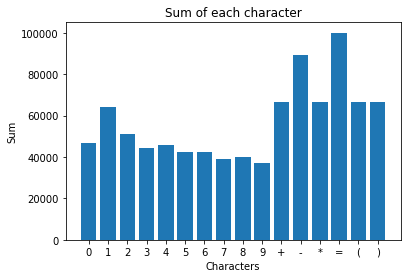

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

fig,ax = plt.subplots()

ax.bar(range(1,len(characters)+1),num_char.loc[:,list(characters)].sum(axis=0))
ticks = ax.set_xticks(range(1,len(characters)+1))
labels = ax.set_xticklabels(characters)
xlabel = ax.set_xlabel('Characters')
ylabel = ax.set_ylabel('Sum')
title = ax.set_title('Sum of each character')

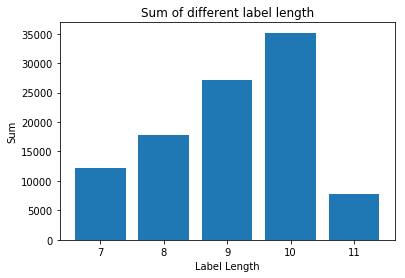

In [3]:
plt.bar(num_char["length"].value_counts().index.tolist(), num_char["length"].value_counts())
plt.xlabel('Label Length') 
plt.ylabel('Sum')
title = plt.title('Sum of different label length')

## 随机验证码模型构建

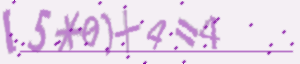

In [4]:
from captcha.image import ImageCaptcha
from PIL import Image
import os
import string
import random

characters = string.digits + '+-*=()'
width, height, n_len, n_class = 300, 64, 15, len(characters)+1
generator = ImageCaptcha(width=width, height=height, font_sizes=range(35, 56), 
                         fonts=['fonts/%s'%x for x in os.listdir('fonts') if '.tt' in x])
generator.generate_image('(5*0)+4=4')

In [5]:
import os
import re
import operation
import cv2

#def batch_gen(batch_size=50:
    


def gen_data(batch_size = 50):

        width, height = 300, 64
        imgs = np.zeros([batch_size, height, width, 1], dtype=np.uint8)
        labels = -1*np.ones([batch_size, 11], dtype=np.int32)
        label_lens = np.zeros(batch_size)
        while True:
            for i in range(batch_size):
                label = operation.generate_expressions(1, 9)
                img = np.array(generator.generate_image(label))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                imgs[i] = img[:,:,np.newaxis]
                labels[i,:len(label)] = [characters.find(x) for x in label]
                label_lens[i] = len(label)
            yield [imgs, labels, np.ones(batch_size)*int(17), label_lens], np.ones(batch_size)


In [24]:
imgs = next(gen_data())
plt.imshow(np.array(imgs))

TypeError: 'function' object is not an iterator

In [31]:
from keras import optimizers
from keras import models
model = models.Sequential()

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [32]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping
history = model.fit_generator(
    gen_data(),
    steps_per_epoch=100000/50,
    epochs=400,
    validation_data=gen_data(),
    validation_steps=int(0.3*100000/50),
    callbacks=[ReduceLROnPlateau('loss',cooldown=1),
               ModelCheckpoint('../model/model_gru_best.h5',save_best_only=True)])

RuntimeError: You must compile your model before using it.

参考：
1. [百度魅族深度学习大赛初赛冠军作品(图像识别.源码)](https://cloud.tencent.com/developer/article/1062013)
2. [徐勇皇(Angus Xu)的机器学习工程师毕业项目](https://github.com/anguschowchowxu/mathematical_expression_recognition)
3. [zzlian的为小学生生成四则运算表达式的程序](https://github.com/zzlian/operation_expression)